<a href="https://colab.research.google.com/github/Darshan0805/Advanced-Machine-Learning/blob/main/2348548_Program2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
df = pd.read_csv('/content/Program_2_Dataset - Program_2_Dataset.csv')
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [40]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crime_Rate,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
Zone_proportion,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
Non_Retail_Acres,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
Avg_rooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
Distance,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
Property_TaxRate,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [42]:
df.columns

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')

In [43]:
predictors = ['Avg_rooms', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']
target = 'MValue'

In [44]:
# Calculate Variance Inflation Factor (VIF)
def calculate_vif(data_frame, predictors):
    X = data_frame[predictors]
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data


In [45]:
# Calculate VIF for selected predictors
vif_results = calculate_vif(df, predictors)
print("VIF Results:")
print(vif_results)

VIF Results:
           Variable        VIF
0         Avg_rooms  16.747965
1          Distance   6.880607
2  Property_TaxRate  13.861510
3  Non_Retail_Acres   9.598374


In [46]:
selected_predictors = ['Avg_rooms', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']

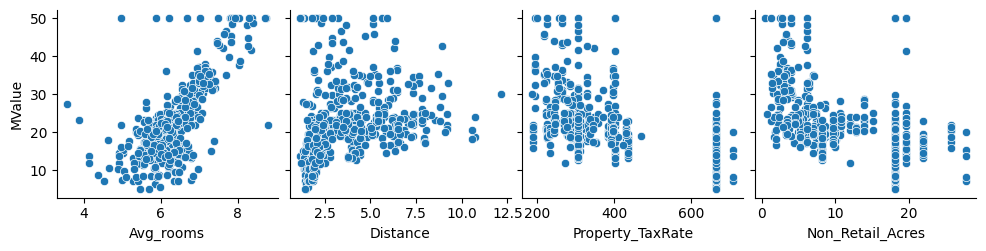

In [47]:
sns.pairplot(df, x_vars=selected_predictors, y_vars=target)
plt.show()

In [48]:
train_data, test_data = train_test_split(df, test_size=0.33, random_state=42)

In [49]:
# multiple linear regression model
X_train = train_data[selected_predictors]
y_train = train_data[target]
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 7.71823295 -0.65291673 -0.01373718 -0.21258162]
Intercept: -15.332210810746496


In [51]:
# Training set
X_test = test_data[selected_predictors]
y_test = test_data[target]
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - len(selected_predictors) - 1)

In [52]:
# Test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - len(selected_predictors) - 1)

In [53]:
print("\nModel Evaluation:")
print("Train MSE:", mse_train)
print("Train R-squared:", r2_train)
print("Train Adjusted R-squared:", adj_r2_train)
print("\nTest MSE:", mse_test)
print("Test R-squared:", r2_test)
print("Test Adjusted R-squared:", adj_r2_test)


Model Evaluation:
Train MSE: 40.83615624350907
Train R-squared: 0.552374742371587
Train Adjusted R-squared: 0.547013960843103

Test MSE: 27.569771797553905
Test R-squared: 0.60781481718806
Test Adjusted R-squared: 0.5981312324272714


Training Set Metrics: Train R-squared: This measures the proportion of the variance in the target variable (MValue) that is predictable from the predictors. The value of 0.55 indicates that 55% of the variability in the target variable is explained by the model.

Train Adjusted R-squared: This measure is similar to R-squared but adjusted for the number of predictors in the model. Value of 0.55 suggests that the model still explains 55% of the variability after accounting for the number of predictors.

Train MSE (Mean Squared Error): This measures the average squared difference between the predicted and actual values on the training set. In this case, it is 40.84.

Test Set Metrics:
Test MSE (Mean Squared Error): Similar to the training MSE, but calculated on the test set. The value is 27.57, indicating the average squared difference between the predicted and actual values on the test set.

Test R-squared: Similar to the training R-squared, but calculated on the test set. The value is 0.61, suggesting that 61% of the variability in the target variable is explained by your model on the test set.

Test Adjusted R-squared: Similar to the training Adjusted R-squared, but calculated on the test set. The value is 0.60, indicating that the model still explains 60% of the variability after adjusting for the number of predictors on the test set.